# Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

For more aesthetically pleasing appearance of Matplotlib figures produced by the
`pandas` library, we select a style that is suitable for statistical graphs using the function
`mpl.style.use`

In [2]:
import matplotlib as mpl

mpl.style.use("ggplot")

In [3]:
import seaborn as sns

# Series

The merit of being able to index a data series with labels rather than integers is apparent
even in the simplest of examples: Consider the following construction of a `Series`
object. We give the constructor a list of integers, to create a `Series` object that represents
the given data. Displaying the object in `IPython` reveals the data of the `Series` object
together with the corresponding indices:

In [4]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

The resulting object is a `Series` instance with the data type (dtype) int64, and
the elements are indexed by the integers 0, 1, 2, and 3. Using the index and values
attributes, we can extract the underlying data for the index and the values stored in the
series:

In [5]:
list(s.index)

[0, 1, 2, 3]

In [6]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

While using integer-indexed arrays or data series is a fully functional representation
of the data, it is not descriptive. For example, if the data represents the population of four
European capitals, it is convenient and descriptive to use the city names as indices rather
than integers. With a `Series` object this is possible, and we can assign the index attribute
of a `Series` object to a list with new indices to accomplish this. We can also set the name
attribute of the `Series` object, to give it a descriptive name

In [7]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"

s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

It is now immediately obvious what the data represents. Alternatively, we can also set
the `index` and `name` attributes through keyword arguments to the `Series` object when it
is created:

In [8]:
s = pd.Series(
    [909976, 8615246, 2872086, 2273305],
    name="Population",
    index=["Stockholm", "London", "Rome", "Paris"],
)

s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

We can access elements in a Series by indexing with the corresponding index (label)
or directly through an attribute with the same name as the index (if the index label is a
valid Python symbol name):

In [9]:
s["London"]

8615246

In [10]:
s.Stockholm

909976

Indexing a `Series` object with a list of indices gives a new `Series` object with a subset
of the original data (corresponding to the provided list of indices):

In [11]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

With a data series represented as a `Series` object, we can easily compute its
descriptive statistics using the `Series` methods `count` (the number of data points),
`median` (calculate the median), `mean` (calculate the mean value), `std` (calculate the
standard deviation), `min` and `max` (minimum and maximum values), and the quantile
(for calculating quantiles):

In [12]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [13]:
s.min(), s.max()

(909976, 8615246)

In [14]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

All of the preceding data are combined in the output of the `describe` method, which
provides a summary of the data represented by a `Series` object:

In [15]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

Using the `plot` method, we can quickly and easily produce graphs that visualize
the data in a `Series` object. The pandas library uses `Matplotlib` for plotting, and we can
optionally pass a `Matplotlib` Axes instance to the plot method via the ax argument. The
type of the graph is specified using the kind argument (valid options are line, hist, bar,
barh, box, kde, density, area, and pie).

<AxesSubplot:title={'center':'pie'}, ylabel='Population'>

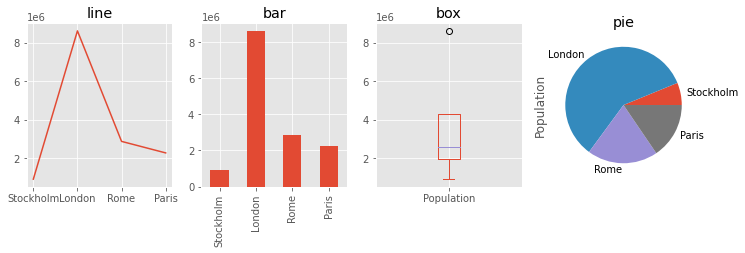

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Provide axes to the `s.plot`
s.plot(ax=axes[0], kind="line", title="line")
s.plot(ax=axes[1], kind="bar", title="bar")
s.plot(ax=axes[2], kind="box", title="box")
s.plot(ax=axes[3], kind="pie", title="pie")

> Examples of plot styles that can be produced with Pandas using the `Series.plot` method

# DataFrame

As we have seen in the previous examples, a pandas `Series` object provides a
convenient container for one-dimensional arrays, which can use descriptive labels for
the elements and which provides quick access to descriptive statistics and visualization.
For higher-dimensional arrays (mainly two-dimensional arrays, or tables), the
corresponding data structure is the Pandas `DataFrame` object. It can be viewed as a
collection of `Series` objects with a common index.

There are numerous ways to initialize a `DataFrame`. For simple examples, the easiest
way is to pass a nested Python list or dictionary to the constructor of the `DataFrame`
object. For example, consider an extension of the dataset we used in the previous
section, where, in addition to the population of each city, we also include a column that
specifies which state each city belongs to. We can create the corresponding `DataFrame`
object in the following way:

In [17]:
df = pd.DataFrame(
    [
        [909976, "Sweden"],
        [8615246, "United Kingdom"],
        [2872086, "Italy"],
        [2273305, "France"],
    ]
)

df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


The result is a tabular data structure with rows and columns. Like with a `Series`
object, we can use labeled indexing for rows by assigning a sequence of labels to the
index attribute, and, in addition, we can set the columns attribute to a sequence of labels
for the columns:

In [18]:
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]

df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


The index and columns attributes can also be set using the corresponding keyword
arguments to the `DataFrame` object when it is created:

In [19]:
df = pd.DataFrame(
    [
        [909976, "Sweden"],
        [8615246, "United Kingdom"],
        [2872086, "Italy"],
        [2273305, "France"],
    ],
    index=["Stockholm", "London", "Rome", "Paris"],
    columns=["Population", "State"],
)

df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


An alternative way to create the same data frame, which sometimes can be more
convenient, is to pass a dictionary with column titles as keys and column data as values:

In [20]:
df = pd.DataFrame(
    {
        "Population": [909976, 8615246, 2872086, 2273305],
        "State": ["Sweden", "United Kingdom", "Italy", "France"],
    },
    index=["Stockholm", "London", "Rome", "Paris"],
)

df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [21]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [22]:
df.State

Stockholm            Sweden
London       United Kingdom
Rome                  Italy
Paris                France
Name: State, dtype: object

The result of extracting a column from a `DataFrame` is a new `Series` object, which we
can process and manipulate with the methods discussed in the previous section. Rows of a
`DataFrame` instance can be accessed using the `loc` indexer attribute. Indexing this attribute
also results in a Series object, which corresponds to a row of the original data frame:

In [23]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

Passing a `list` of row labels to the `loc` indexer results in a new `DataFrame` that is a
subset of the original `DataFrame`, containing only the selected rows:

In [24]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


The `loc` indexer can also be used to select both rows and columns simultaneously,
by first passing a row label (or a list thereof) and second a column label (or a list
thereof). The result is a `DataFrame`, a `Series`, or an element value, depending on the
number of columns and rows that are selected:

In [25]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

We can compute descriptive statistics using the same methods as we already used
for `Series` objects. When invoking those methods (mean, std, median, min, max, etc.) for a
`DataFrame`, the calculation is performed for each column with numerical data types:

In [26]:
df.Population.mean()

3667653.25

In this case, only one of the two columns has a numerical data type (the one named
Population). Using the `DataFrame` method info and the attribute `dtypes`, we can obtain
a summary of the content in a `DataFrame` and the data types of each column:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [28]:
df.dtypes

Population     int64
State         object
dtype: object

In [39]:
df_pop = pd.read_csv("./european_cities.csv", delimiter=",", encoding="utf-8", header=0)

This dataset is similar to the example data we used earlier in this chapter, but here
there are additional columns and many more rows for other cities. Once a dataset is read
into a `DataFrame` object, it is useful to start by inspecting the summary given by the info
method, to begin forming an idea of the properties of the dataset.

In [40]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Here we see that there are 105 rows in this dataset and that it has five columns. Only
the `Rank` column is of a numerical data type. In particular, the `Population` column is
not yet of numeric data type because its values are of the format "8,615,246" and is
therefore interpreted as string values by the `read_csv` function. It is also informative
to display a tabular view of the data. However, this dataset is too large to display in full,
and in situations like this, the head and tail methods are handy for creating a truncated
dataset containing the first few and last few rows, respectively. Both of these functions
take an optional argument that specifies how many rows to include in the truncated
`DataFrame`. Note also that `df.head(n)` is equivalent to `df[:n]`, where n is an integer.

In [41]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [42]:
# The same way to read 5 from the head
df_pop[:5]

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


Displaying a truncated `DataFrame` gives a good idea of how the data look like and
what remains to be done before the data is ready for analysis. It is common to have
to transform columns in one way or another and to reorder the table by sorting by a
specific column or by ordering the index. In the following we explore some methods
for modifying `DataFrame` objects. First of all, we can create new columns and update
columns in a `DataFrame` simply by assigning a `Series` object to the `DataFrame` indexed
by the column name, and we can delete columns using the Python `del` keyword.
The apply method is a powerful tool to transform the content in a column. It creates
and returns a new `Series` object for which a function passed to apply has been applied
to each element in the original column. For example, we can use the apply method to
transform the elements in the `Population` column from strings to integers, by passing a
lambda function that removes the "," characters from the strings and casts the results
to an integer. Here we assign the transformed column to a new column with the name
NumericPopulation. Using the same method, we also tidy up the `State` values by
removing extra white spaces in its elements using the string method `strip`.

In [43]:
# Create the Numeric Population column
df_pop["Numeric Population"] = df_pop.Population.apply(
    lambda x: int(x.replace(",", ""))
)

df_pop.head()

,Rank,City,State,Population,Date of census/estimate,Numeric Population
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [44]:
# State contains extra whitespaces
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [45]:
# Strip every item
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

df_pop.head()

,Rank,City,State,Population,Date of census/estimate,Numeric Population
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


Inspecting the data types of the columns in the updated `DataFrame` confirms that the
new column `NumericPopulation` is indeed of integer type (while the `Population` column
is unchanged):

In [46]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
Numeric Population          int64
dtype: object

We may also need to change the `index` to one of the columns of the `DataFrame`. In the
current example, we may want to use the `City` column as index. We can accomplish this
using the `set_index` method, which takes as argument the name of the column to use as
index. The result is a new `DataFrame` object, and the original `DataFrame` is unchanged.
Furthermore, using the `sort_index` method, we can sort the data frame with respect to
the index:

In [49]:
# Set index column
df_pop2 = df_pop.set_index("City")
# Sort by index
df_pop2 = df_pop2.sort_index()

df_pop2.head()

,Rank,State,Population,Date of census/estimate,Numeric Population
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


The `sort_index` method also accepts a list of column names, in which case a
hierarchical index is created. A hierarchical index uses tuples of index labels to address
rows in the data frame. We can use the `sort_index` method with the integer-valued
argument level, to sort the rows in a `DataFrame` according to the nth level of the
hierarchical index, where `level=n`. In the following example, we create a hierarchical
index with State and City as indices, and we use the `sort_index` method to sort by the
first index (State):

In [52]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       Numeric Population  
State    City                              
Austria  Vienna                   1794770  
Belgium  Antwerp                   510610  
         Brussels[17]             1175831  
Bulgaria Plovdiv                   341041  
         Sofia                    1291895  
         Varna                     335819  
Croatia  Zagreb                    790017

A `DataFrame` with a hierarchical index can be partially indexed using only its zeroth-level index (`df3.loc["Sweden"]`) or completely indexed using a tuple of all hierarchical indices (`df3.loc[("Sweden", "Gothenburg")]`):

In [53]:
# Sweden cities
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,Numeric Population
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [55]:
# Just Gothenburg
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
Numeric Population                528014
Name: (Sweden, Gothenburg), dtype: object

If we want to sort by a column rather than the index, we can use the `sort_values`
method. It takes a column name, or a list of column names, with respect to which the
`DataFrame` is to be sorted. It also accepts the keyword argument ascending, which is a
`Boolean` or a list of `Boolean` values that specifies whether the corresponding column is to
be sorted in ascending or descending order:

In [57]:
df_pop.set_index("City").sort_values(
    ["State", "Numeric Population"], ascending=[False, True]
).head()

,Rank,State,Population,Date of census/estimate,Numeric Population
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


With categorical data such as the `State` column, it is frequently of interest to
summarize how many values of each category a column contains. Such counts can be
computed using the `value_counts` method (of the `Series` object). For example, to count
the number of cities each country has on the list of the 105 largest cities in Europe, we
can use:

In [58]:
city_counts = df_pop.State.value_counts()

city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

In this example, we see from the results that the state with the largest number of
cities in the list is Germany, with 19 cities, followed by the United Kingdom with 16
cities, and so on. A related question is how large the total population of all cities within
a state is. To answer this type of question, we can proceed in two ways: First, we can
create a hierarchical index using `State` and `City` and use the sum method to reduce the
`DataFrame` along one of the indices. In this case, we want to sum over all entries within
the index level State, so we can use sum(`level="State"`), which eliminates the `City`
index. For presentation we also sort the resulting `DataFrame` in descending order of the
column `NumericPopulation`:

In [72]:
df_pop3 = df_pop[["State", "City", "Numeric Population"]].set_index(["State", "City"])

df_pop4 = (
    df_pop3.groupby("State").sum().sort_values("Numeric Population", ascending=False)
)

df_pop4.head()

,Numeric Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [75]:
# Drop Rank and groupby State

df_pop5 = (
    df_pop.drop("Rank", axis=1)
    .groupby("State")
    .sum()
    .sort_values("Numeric Population", ascending=False)
)

df_pop5.head()

,Numeric Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


Note that here we also used the drop method to remove the Rank column (hence the
`axis=1`, use `axis=0` to drop rows) from the `DataFrame` (since it is not meaningful
to aggregate the rank by summation). Finally, we use the plot method of the `Series`
object to plot bar graphs for the city count and the total population. The results are
shown in Figure

Text(0.5, 0, 'Total pop. in top 105 cities')

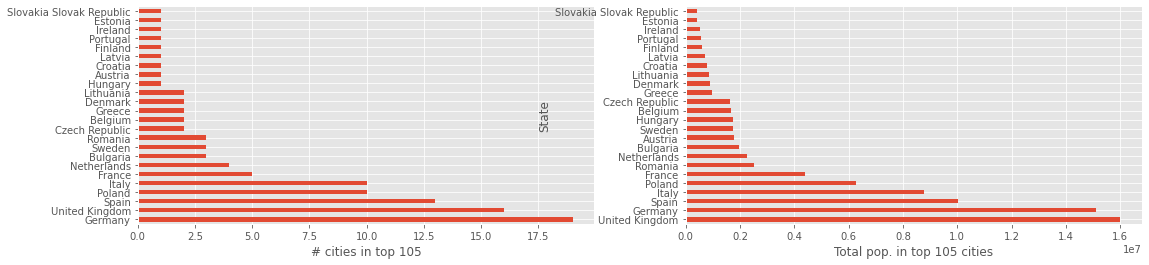

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

# Plot city counts
city_counts.plot(kind='barh', ax=ax1)

ax1.set_xlabel("# cities in top 105")

# Plot Numeric Population
df_pop5["Numeric Population"].plot(kind='barh', ax=ax2)

ax2.set_xlabel("Total pop. in top 105 cities")

> The number of cities in the list of the top 105 most populated cities in
Europe (left) and the total population in those cities (right), grouped by state